In [1]:
jtplot.reset()
%matplotlib inline
from structurefunction import structure_function
import numpy as np
from astropy.table import Table
from astropy.coordinates import SkyCoord
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import astropy.units as u

The second-order structure function of rotation measure (RM) is given by:

$$ SF_{\text{RM},\text{obs}}(\delta\theta) = \langle[\text{RM}{\theta} - \text{RM}(\theta+\delta\theta)]^2\rangle$$

That is, the ensemble average of the squared-difference in RM for sources with angular seperation $\delta\theta$. We also need to correct for the impact of errors by:

$$ SF_{\text{RM}}(\delta\theta) = SF_{\text{RM},\text{obs}}(\delta\theta) - SF_{\sigma_\text{RM}}(\delta\theta) $$

See Haverkorn et al. 2004 (2004ApJ...609..776H) for details.

Here we'll reproduce the results of Mao et al. 2010 (2010ApJ...714.1170M).

First, we can look at the expected results. I've pulled these data from the paper's plots using a web plot digitiser.

In [2]:
mao_sf = 10**np.array([2.417894195735458,
                    2.097768739428083,
                    2.2926445508823967,
                    2.164149088774578,
                    2.1404402085381147,
                    2.176621779798478,
                    2.218782670913379,
                    2.2444782900152482,
                    2.2476963207124476,
                    2.2837806390213578,]) * (u.rad / u.m**2)**2
mao_sep = 10**np.array([-0.7729091483767441, 
                    -0.5386163683663935, 
                    -0.2730532911440767, 
                    -0.02550632317850443, 
                    0.21819567988496358, 
                    0.47213008276920787, 
                    0.7173429798998987, 
                    0.9643533199726302, 
                    1.18882007856649, 
                    1.3453070240944185,]) * u.deg

Text(0, 0.5, 'RM SF [$\\mathrm{rad^{2}\\,m^{-4}}$]')

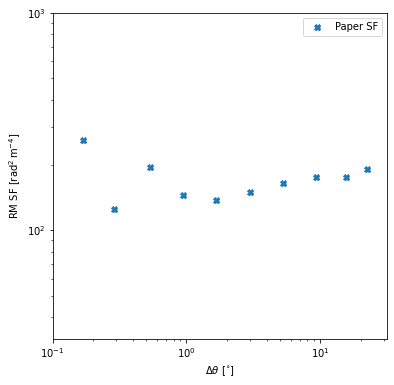

In [3]:
plt.figure(figsize=(6,6))
plt.plot(mao_sep, mao_sf, 'X', label='Paper SF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**1.5, 10**3)
plt.xlim(10**-1,10**1.5)
plt.legend()
plt.xlabel(rf"$\Delta\theta$ [{mao_sep.unit:latex_inline}]")
plt.ylabel(rf"RM SF [{mao_sf.unit:latex_inline}]")

Now we'll start with the original data. We'll convert the data to an astropy table for convenience

In [4]:
with open('apj343194t1_mrt.txt') as f:
    lines = f.readlines()
for i, line in enumerate(tqdm(lines)):
    lines[i] = line.strip()
coords, rms, e_rms, flags, incs = [], [], [], [], []
for i, line in enumerate(tqdm(lines)):
    ra = f"{line[0:2]}h{line[3:5]}m{line[6:11]}s"
    #print(ra)
    dec = f"{line[12]}{line[13:15]}d{line[16:18]}m{line[19:24]}s"
    coord = SkyCoord(ra, dec)
    rm = float(line[39:42]) * (u.rad / u.m**2)
    e_rm = float(line[43:45]) * (u.rad / u.m**2)
    inc = line[63] == 'Y'
    incs.append(inc)
    try:
        flag = line[67]
    except:
        flag = None
    coords.append(coord)
    rms.append(rm)
    e_rms.append(e_rm)
    flags.append(flag)

mao_rm_tab = Table()
mao_rm_tab.add_column(coords, name='coordinates')
mao_rm_tab.add_column(rms, name='RM')
mao_rm_tab.add_column(e_rms, name='e_RM')
mao_rm_tab.add_column(incs, name='included')
mao_rm_tab.add_column(flags, name='flag')

mao_rm_tab

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

coordinates,RM,e_RM,included,flag
"deg,deg",rad / m2,rad / m2,,
object,float64,float64,bool,object
"196.78470833333333,24.78352777777778",-3.0,4.0,True,None
"203.9505833333333,20.171111111111113",3.0,5.0,False,b
"201.06033333333332,22.220305555555555",-6.0,6.0,True,None
"201.07991666666663,22.233472222222222",0.0,6.0,True,None
"199.01816666666664,23.62713888888889",4.0,13.0,True,None
"200.20225,22.965194444444442",-6.0,8.0,True,None
"197.81804166666666,24.454333333333334",5.0,3.0,True,None
"203.60637499999996,21.167916666666667",-1.0,9.0,False,b


f

Now we'll define our own bin edges to compute a structure function

In [5]:
start = -0.8
stop = 1.5
step = 0.1
bins = 10**np.arange(start, stop+step, step)*u.deg

Here we compute the strcture function itself, including error correction. We use 1000 samples of each distribution for error propagation.

By setting `show_plots=True` three plots are shown. 
1. An error-bar plot of the SF.
2. A count of the number of source pairs per SF bin
3. A structure function image showing the sampling from Monte-Carlo error propagation

The `structure_function` function returns the centre of each bin, the median value of each bin, the upper and lower error bounds, and the number of sources in each bin.

By setting `fit=True` we use `bilby` to do a best-fit of the SF with a broken power law. Here we're using `ultranest` to do the sampling. All `**kwargs` are passed onto the `run_sampler` method of `bilby`.

In [6]:
import multiprocessing as mp

Sampling errors...


Sample Gaussian:   0%|          | 0/400 [00:00<?, ?it/s]

Getting data differences...
Getting data error differences...
Getting angular separations...
Computing SF...


  0%|          | 0/24 [00:00<?, ?it/s]

16:00 bilby INFO    : Running for label 'linear_regression', output will be saved to 'outdir'
16:00 bilby INFO    : Search parameters:
16:00 bilby INFO    :   amplitude = Uniform(minimum=-231.35019860428807, maximum=648.3223764234214, name='amplitude', latex_label='amplitude', unit=None, boundary=None)
16:00 bilby INFO    :   x_break = Uniform(minimum=0.17900777537149964, maximum=28.37082045838975, name='x_break', latex_label='x_break', unit=None, boundary=None)
16:00 bilby INFO    :   alpha_1 = Uniform(minimum=-2, maximum=2, name='alpha_1', latex_label='alpha_1', unit=None, boundary=None)
16:00 bilby INFO    :   alpha_2 = Uniform(minimum=-2, maximum=2, name='alpha_2', latex_label='alpha_2', unit=None, boundary=None)
16:00 bilby INFO    : Single likelihood evaluation took 9.938e-05 s
16:00 bilby WARNING : Supplied argument 'npool' not an argument of 'Ultranest', removing.
16:00 bilby WARNING : Supplied argument 'sample' not an argument of 'Ultranest', removing.
16:00 bilby INFO    : Us

Fitting SF with a broken power law...
[ultranest.integrator.NestedSampler] Num live points [200]
[ultranest.integrator.NestedSampler] Resuming...
[ultranest.integrator.NestedSampler] Starting sampling ...


Z=-1e+02+-1e+02 | Like=-1e+02..-1e+02 | it/evals=2760/0 eff=inf%  
niter: 2793
 ncall: 0
 nsamples: 2993
 logz: -127.536 +/-  0.170
 h:  5.752


16:00 bilby INFO    : Overwriting outdir/ultra_linear_regression/ with /var/folders/rg/tk14ndkj435d8d1yj25dbz1w00p7kq/T/tmpdbplni62/
16:00 bilby INFO    : Sampling time: 0:01:16.721738
16:00 bilby INFO    : Summary of results:
nsamples: 568
ln_noise_evidence:    nan
ln_evidence: -127.536 +/-  0.170
ln_bayes_factor:    nan +/-  0.170



Fitting results:
    Amplitude: 190 ± 30 [rad / m2]
    Break point: 21 ± 5 [deg]
    alpha 1 (theta < break): -0.11 ± 0.08
    alpha 2 (theta > break): 0 ± 1


  0%|          | 0/24 [00:00<?, ?it/s]

/Users/tho822/GoogleDrive/repos/structurefunction/structurefunction.py:265: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, counts.T, cmap=plt.cm.cubehelix_r, shading="auto")


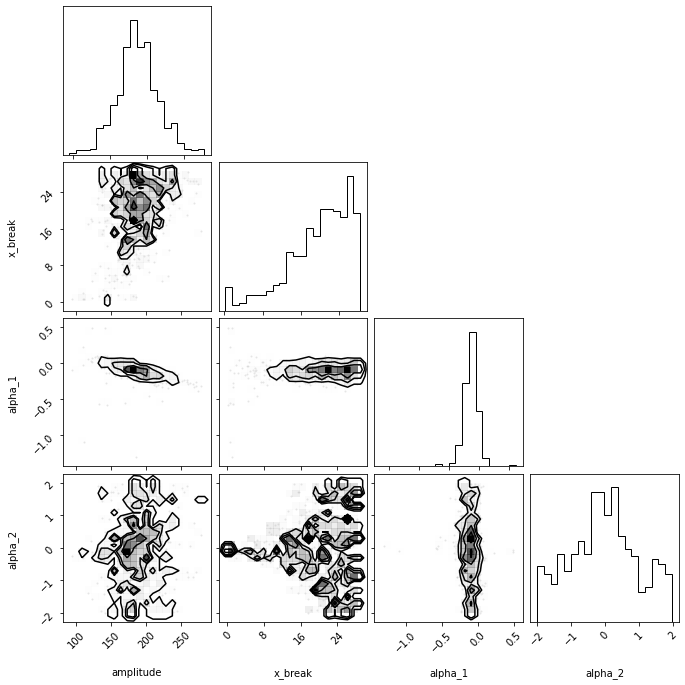

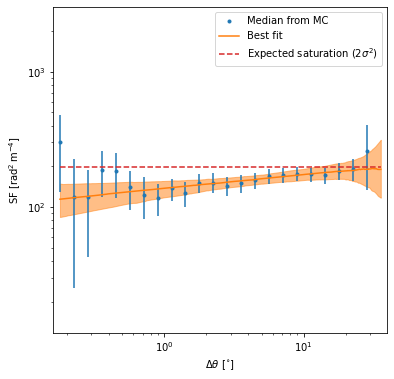

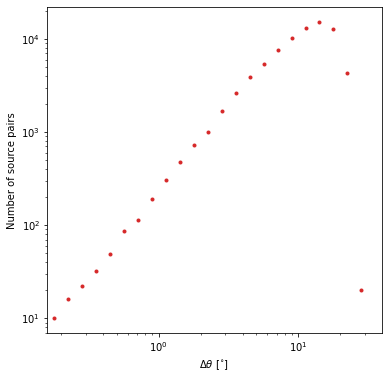

<Figure size 432x288 with 0 Axes>

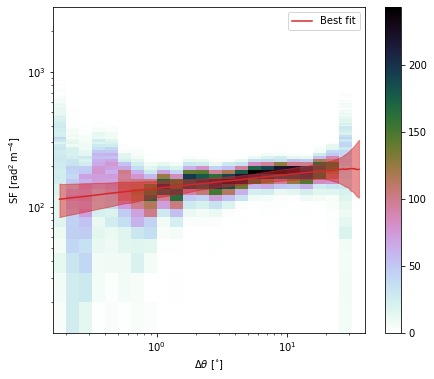

In [7]:
cbins, medians, err, count, result = structure_function(
    mao_rm_tab['RM'][mao_rm_tab['included']],
    mao_rm_tab['e_RM'][mao_rm_tab['included']],
    mao_rm_tab['coordinates'][mao_rm_tab['included']],
    1000,
    bins,
    show_plots=True,
    verbose=True,
    fit=True,
    nlive=200,
    sampler='ultranest',
)

Finally, we can compare our results to those from the original paper.

Text(0, 0.5, 'RM SF [$\\mathrm{rad^{2}\\,m^{-4}}$]')

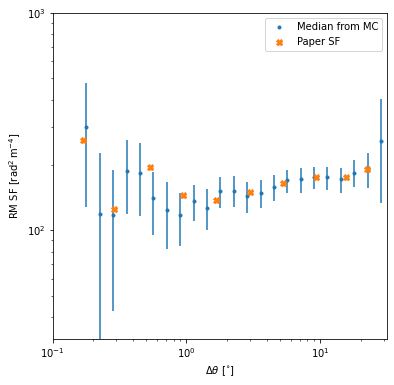

In [8]:
plt.figure(figsize=(6,6), facecolor='w')
plt.plot(cbins, medians, '.', label='Median from MC')
plt.errorbar(cbins.value, medians, yerr=err, color='tab:blue', marker=None, fmt=' ', )#label = '16th to 84th percentile range')
plt.plot(mao_sep, mao_sf, 'X', label='Paper SF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**1.5, 10**3)
plt.xlim(10**-1,10**1.5)
plt.legend()
plt.xlabel(rf"$\Delta\theta$ [{mao_sep.unit:latex_inline}]")
plt.ylabel(rf"RM SF [{mao_sf.unit:latex_inline}]")